# <font color="maroon">Template: Basic NMR</font>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/ColabNotebooks/NMR_template.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/JupyterBook/NMR_template.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

To use this template, you need to prepare a text file with NMR relaxation data in it (see HETs_15N.txt or ubi_soln.txt for example). If you intend to run on a local pyDR installation, then you just need to point pyDR to the file. If you want to run in Google Colab, the file needs to be available online somehow. The suggested options are in your Google drive, where we will mount Google drive in the notebook, or via a shareable weblink (for example, also available in Dropbox, Google Drive, etc.).

In [1]:
#Setup: Make sure packages are installed in google colab. 
#Also, make sure that we start in the main folder of the tutorial
import sys
import os
cwd=os.getcwd()
if 'google.colab' in sys.modules:
    !git clone https://github.com/alsinmr/pyDR_tutorial.git
    from pyDR_tutorial import colab_setup
else:
    os.chdir(os.path.join(cwd,'..')) #Go to the JupyterBook directory
    sys.path.append(os.path.join(cwd,'../..')) #Path to pyDR (make sure this is correct if working locally)

In [2]:
#Imports
import pyDR

## Load NMR Data

If running in Google Colab, we recommend mounting Google Drive and accessing your data via google drive. Other bash/python based methods can be used, however. If running locally, just provide the path to your data.

Mounting Google Drive will first cause a prompt in this window, followed by a popup window for logging in.

In [3]:
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    data=pyDR.IO.readNMR(os.path.join('/content/drive/MyDrive','path_to_data'))
else:
    data=pyDR.IO.readNMR('data/HETs_15N.txt')  #Replace with path to data
    
proj=pyDR.Project(directory=None)    #Include a directory to save the data (can be in Google Drive)
proj.append_data(data)

## Attach structure to the data

## Plot the data

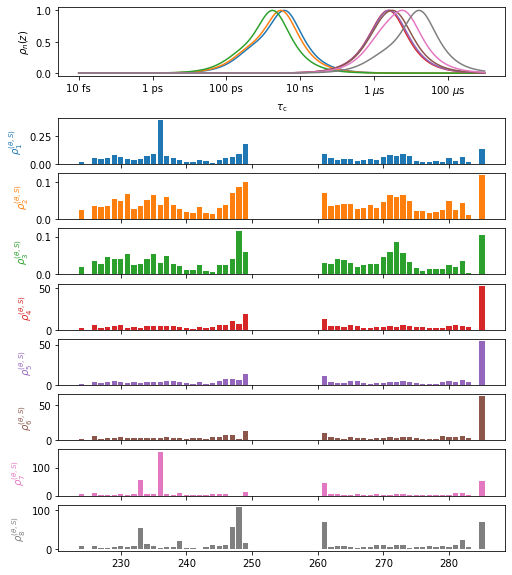

In [4]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

## Process NMR data

In [5]:
data.detect.r_auto(4)    #Set number of detectors here
# data.detect.inclS2() #Uncomment if including order parameters

fit=data.fit()  #Fit the data

Plot the results

In [6]:
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

AssertionError: Unknown parameter

## Plot the fit quality

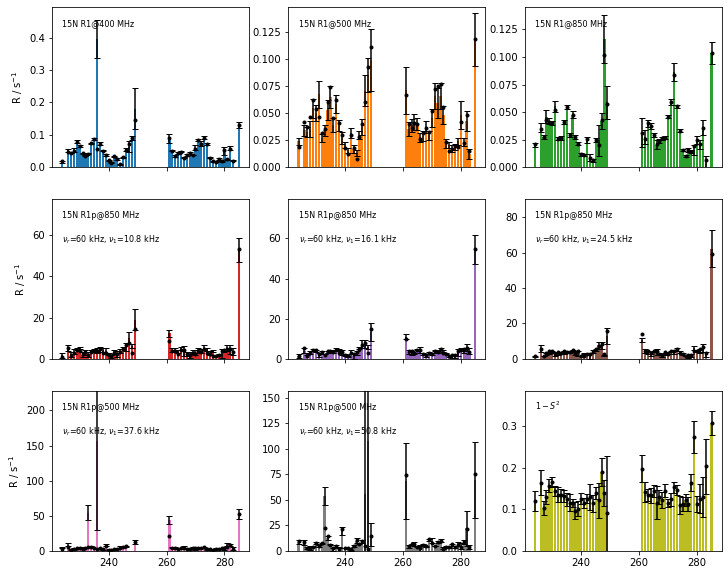

In [8]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

## Connecting data to locations in a structure, 3D visualization

It is often useful to see how relaxation parameters relate to the structure. Also, for sake of comparison of dynamics between methods, one may assign a common set of labels, but alternatively, one may associate dynamics via the structure. For both, we may attach a "selection" object to the data. The selection is a list of atom groups (from the [MDAnalysis](http://mdanalysis.org/) software packgage), with the same number of entries as the number of data points in the data object (len(data)).

We will also include a 'Project' here. Projects add a lot of functionality; here they provide us with convenient communcation with [ChimeraX](https://www.cgl.ucsf.edu/chimerax/).

In [20]:
proj=pyDR.Project()  #Project without storage location
proj.append_data(data) #Add data to project
data.select=pyDR.MolSelect(topo='data/HETs_2kj3.pdb') #Add selection to data

# data.label contains the residue numbers, so we can just point to these. 
#The pdb contains 3 copies of HET-s (segments A,B,C), so we have to select just one segment
_=data.select.select_bond(Nuc='N',resids=data.label,segids='B') #Define the selection

fit=data.fit()  #Selections are automatically passed from data to fit
#but, we do need to re-run the fit to achieve this

If you are running locally (**Does not work in Google Colab!**), you can view the detector analysis directly on the HET-s molecule. Note, this requires installation of ChimeraX. It also requires providing pyDIFRATE with a path to the ChimeraX executable, although this step only needs to be done once, unless the program is moved, updated, etc.

In [21]:
#Set chimera path (only required once)
pyDR.chimeraX.chimeraX_funs.set_chimera_path('/Applications/ChimeraX-1.5.app/Contents/MacOS/ChimeraX')

fit.chimera()
proj.chimera.command_line('~show ~/B@N,C,CA') #Send command to chimera

You can mouse over the different detector names in ChimeraX ($\rho_0$,$\rho_1$,etc.), to view the different detector responses. However, the size of the responses are on different scales, so only $\rho_0$ is visible on the default scale. Run the cells below to view the different responses.

In [23]:
proj.chimera.close()
fit.chimera(rho_index=[1,2])
proj.chimera.command_line('~show ~/B@N,C,CA')

In [26]:
proj.chimera.close()
fit.chimera(rho_index=[3,4],scaling=200)
proj.chimera.command_line('~show ~/B@N,C,CA')